Описание проекта

# 1. Загрузим данные

In [1]:
# Импорт библиотек
import gc
import os
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt

import lightgbm as lgb
from pyod.models.knn import KNN
from sklearn.ensemble import RandomForestRegressor
from catboost import Pool, CatBoostRegressor, cv

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
# Загрузим данные
PATH = './datasets/final_steel/'
files = os.listdir(PATH)
# Поместим датасеты в словарь
df_dict = {file.split('.')[0]:pd.read_csv(PATH+file) for file in files}

In [3]:
# Посмотрим на датасеты
for df in df_dict.keys():
    print(df,':\n')
    print(df_dict[df].info(),'\n\n')
    display(df_dict[df].head(5))

data_temp :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB
None 




,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


data_gas :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None 




,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


data_wire :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None 




,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


data_arc :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None 




,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


data_bulk_time :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB
None 




,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


data_wire_time :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB
None 




,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


data_bulk :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
None 




,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [4]:
# Заменим все пробелы на подчеркивания
for df in df_dict.keys():
    C = {}
    for col in df_dict[df].columns:
        C[col] = col.replace(' ', '_')
    df_dict[df].rename(columns=C, inplace=True)

# Переименуем Газ_1 в gas
df_dict['data_gas'].rename(columns={'Газ_1':'gas'}, inplace=True)

In [5]:
# Конвертируем время
for df in df_dict.keys():
    for col in df_dict[df].columns:
        if df_dict[df][col].dtype == 'object':
            df_dict[df][col] = pd.to_datetime(df_dict[df][col])

# 2. Добавим признаки, сгруппируем и объединим датасеты

In [6]:
# Добавим признаки:
c = 'data_arc'
# Переведем в киловаты/вары
df_dict[c]['Активная_мощность']   = df_dict[c]['Активная_мощность']*1000
df_dict[c]['Реактивная_мощность'] = df_dict[c]['Реактивная_мощность']*1000
# Добавим полную мощность S = (P^2 + S^2)^0.5
df_dict[c]['S'] = (df_dict[c]['Активная_мощность']**2 + df_dict[c]['Реактивная_мощность']**2)**0.5
# Добавим расход элетроэнергии kWh = kW * t (t в часах)
df_dict[c]['kWh'] = df_dict[c]['S']*(df_dict[c]['Конец_нагрева_дугой']-df_dict[c]['Начало_нагрева_дугой'])/np.timedelta64(60*60, 's')
# Добавим коэффициент мощности
df_dict[c]['cosf'] = df_dict[c]['Активная_мощность']/df_dict[c]['S']
# Добавим время работы печи в секундах
df_dict[c]['work_time_sek'] = (df_dict[c]['Конец_нагрева_дугой']-df_dict[c]['Начало_нагрева_дугой'])/np.timedelta64(1, 's')

df_dict[c]

,key,Начало_нагрева_дугой,Конец_нагрева_дугой,Активная_мощность,Реактивная_мощность,S,kWh,cosf,work_time_sek
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,976.058751,687.083721,1193.639277,75.597154,0.817717,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,805.607080,520.285249,959.009650,49.282440,0.840041,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,744.363427,498.805404,896.037802,42.810695,0.830728,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1659.362555,1062.669396,1970.469572,199.783720,0.842115,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,692.754745,414.397240,807.238632,33.186477,0.858178,148.0
...,...,...,...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,533.669584,354.438692,640.648119,27.939376,0.833015,157.0
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,676.603734,523.630768,855.559346,42.777967,0.790832,180.0
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,733.899474,475.653648,874.559793,44.699723,0.839164,184.0
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,220.693946,145.768404,264.488649,4.187737,0.834417,57.0


In [7]:
# Сгруппируем data_arc по key, найдем начало и конец обработки металла, затраченое кол-во энергии и др фичи
df = df_dict['data_arc'].groupby('key').agg({'Начало_нагрева_дугой' : 'min',
                                             'Конец_нагрева_дугой'  : 'max',
                                             'Активная_мощность'    : 'mean',
                                             'Реактивная_мощность'  : 'mean',
                                             'work_time_sek'        : 'sum',
                                             'S'          : 'mean',
                                             'cosf'       : 'mean',
                                             'kWh'        : 'sum'}).reset_index()

In [8]:
# Сгруппируем data_temp по key, найдем первую и последнюю температуру и их время.
df_temp = df_dict['data_temp'].groupby('key').first()
df_temp.rename(columns={'Время_замера':'first_temp_time', 'Температура':'first_temp'}, inplace=True)
df_temp[['last_temp_time', 'last_temp']]  = df_dict['data_temp'].groupby('key').last()
df_temp = df_temp.reset_index()
df_temp

,key,first_temp_time,first_temp,last_temp_time,last_temp
0,1,2019-05-03 11:16:18,1571.0,2019-05-03 11:30:39,1613.0
1,2,2019-05-03 11:37:27,1581.0,2019-05-03 11:59:12,1602.0
2,3,2019-05-03 12:13:17,1596.0,2019-05-03 12:34:57,1599.0
3,4,2019-05-03 12:52:57,1601.0,2019-05-03 12:59:25,1625.0
4,5,2019-05-03 13:23:19,1576.0,2019-05-03 13:36:01,1602.0
...,...,...,...,...,...
3211,3237,2019-08-31 22:44:04,1569.0,2019-08-31 23:05:43,1569.0
3212,3238,2019-08-31 23:30:31,1584.0,2019-08-31 23:43:00,1584.0
3213,3239,2019-09-01 01:31:47,1598.0,2019-09-01 02:24:15,1598.0
3214,3240,2019-09-01 02:39:01,1617.0,2019-09-01 03:35:16,1617.0


In [9]:
# объеденим необходимые таблицы
df = pd.merge(df, df_dict['data_wire'], how='outer', on=['key'])
df = pd.merge(df, df_dict['data_bulk'], how='outer', on=['key'])
df = pd.merge(df, df_dict['data_gas'],  how='outer', on=['key'])
df = pd.merge(df, df_temp,              how='outer', on=['key'])
df

,key,Начало_нагрева_дугой,Конец_нагрева_дугой,Активная_мощность,Реактивная_мощность,work_time_sek,S,cosf,kWh,Wire_1,...,Bulk_11,Bulk_12,Bulk_13,Bulk_14,Bulk_15,gas,first_temp_time,first_temp,last_temp_time,last_temp
0,1,2019-05-03 11:02:14,2019-05-03 11:28:37,975.629312,636.648202,1098.0,1165.278987,0.837756,400.660487,60.059998,...,NaN,206.0,NaN,150.0,154.0,29.749986,2019-05-03 11:16:18,1571.0,2019-05-03 11:30:39,1613.0
1,2,2019-05-03 11:34:14,2019-05-03 11:53:18,763.149519,499.527976,811.0,912.304099,0.840158,244.787101,96.052315,...,NaN,206.0,NaN,149.0,154.0,12.555561,2019-05-03 11:37:27,1581.0,2019-05-03 11:59:12,1602.0
2,3,2019-05-03 12:06:54,2019-05-03 12:32:19,505.176443,319.815195,655.0,597.906832,0.845421,145.851882,91.160157,...,NaN,205.0,NaN,152.0,153.0,28.554793,2019-05-03 12:13:17,1596.0,2019-05-03 12:34:57,1599.0
3,4,2019-05-03 12:39:37,2019-05-03 12:57:50,802.312520,515.074417,741.0,953.740594,0.841682,221.364253,89.063515,...,NaN,207.0,NaN,153.0,154.0,18.841219,2019-05-03 12:52:57,1601.0,2019-05-03 12:59:25,1625.0
4,5,2019-05-03 13:11:13,2019-05-03 13:33:55,836.793184,563.160673,869.0,1008.939456,0.828104,333.093877,89.238236,...,NaN,203.0,NaN,151.0,152.0,5.413692,2019-05-03 13:23:19,1576.0,2019-05-03 13:36:01,1602.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,2469,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.335164,NaT,NaN,NaT,NaN
3237,2491,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.382644,NaT,NaN,NaT,NaN
3238,2683,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.338997,NaT,NaN,NaT,NaN
3239,3200,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.908588,NaT,NaN,NaT,NaN


# 3. Удалим пропуски

In [10]:
# Удалим строки с пустыми целевыми признакоми и нулевой затраченой энергией
df = df.drop(df.loc[df['first_temp'].isna()].index)
df = df.drop(df.loc[df['kWh'].isna()].index).sort_values(by = 'key').reset_index(drop=True)
# Удалим равные температуры
df = df.drop(df.loc[df['first_temp']==df['last_temp']].index)

# Удалим столбцы пустые на 80% и более 
for col in df.columns:
    if df[col].isna().sum() > len(df)*0.8:
        df = df.drop(col, axis=1)

# Остальные пропуски заполним нулями
df = df.fillna(0)
# Проверим есть ли нулевые температуры
df.loc[df['last_temp']==0]

,key,Начало_нагрева_дугой,Конец_нагрева_дугой,Активная_мощность,Реактивная_мощность,work_time_sek,S,cosf,kWh,Wire_1,...,Bulk_3,Bulk_4,Bulk_12,Bulk_14,Bulk_15,gas,first_temp_time,first_temp,last_temp_time,last_temp


In [11]:
# Удалим ненужые фреймы и соберем мусор
del df_temp, df_dict
gc.collect()

51

# 4. Добавим дополнительные фичи и преобразуем данные

In [12]:
# Добавим фичей:
# Время работы печи в минутах и сек
#df['work_time_min'] = df['work_time_sek']//60
#df['work_time_sek'] = df['work_time_sek']% 60
# Общая продолжительность подготовки металла
df['all_time_sek'] = (df['Конец_нагрева_дугой']-df['Начало_нагрева_дугой'])/np.timedelta64(1, 's')
#df['all_time_min'] = df['all_time_sek']//60
#df['all_time_sek'] = df['all_time_sek']% 60
# Кол-во минут и сек. до первого измерения температуры
df['first_temp_sec'] = (df['first_temp_time']-df['Начало_нагрева_дугой'])/np.timedelta64(1, 's')
#df['first_temp_min'] = df['first_temp_sec']//60
#df['first_temp_sec'] = df['first_temp_sec']% 60
# Умножим cosf на 100, что бы при переводе в int значение не обнулилось
df['cosf'] = df['cosf']*100

df.head()

,key,Начало_нагрева_дугой,Конец_нагрева_дугой,Активная_мощность,Реактивная_мощность,work_time_sek,S,cosf,kWh,Wire_1,...,Bulk_12,Bulk_14,Bulk_15,gas,first_temp_time,first_temp,last_temp_time,last_temp,all_time_sek,first_temp_sec
0,1,2019-05-03 11:02:14,2019-05-03 11:28:37,975.629312,636.648202,1098.0,1165.278987,83.775574,400.660487,60.059998,...,206.0,150.0,154.0,29.749986,2019-05-03 11:16:18,1571.0,2019-05-03 11:30:39,1613.0,1583.0,844.0
1,2,2019-05-03 11:34:14,2019-05-03 11:53:18,763.149519,499.527976,811.0,912.304099,84.015835,244.787101,96.052315,...,206.0,149.0,154.0,12.555561,2019-05-03 11:37:27,1581.0,2019-05-03 11:59:12,1602.0,1144.0,193.0
2,3,2019-05-03 12:06:54,2019-05-03 12:32:19,505.176443,319.815195,655.0,597.906832,84.542081,145.851882,91.160157,...,205.0,152.0,153.0,28.554793,2019-05-03 12:13:17,1596.0,2019-05-03 12:34:57,1599.0,1525.0,383.0
3,4,2019-05-03 12:39:37,2019-05-03 12:57:50,802.312520,515.074417,741.0,953.740594,84.168191,221.364253,89.063515,...,207.0,153.0,154.0,18.841219,2019-05-03 12:52:57,1601.0,2019-05-03 12:59:25,1625.0,1093.0,800.0
4,5,2019-05-03 13:11:13,2019-05-03 13:33:55,836.793184,563.160673,869.0,1008.939456,82.810442,333.093877,89.238236,...,203.0,151.0,152.0,5.413692,2019-05-03 13:23:19,1576.0,2019-05-03 13:36:01,1602.0,1362.0,726.0


In [13]:
# Преобразуем тип в int16 для нормальной работы CatBoost
# Создадим функцию конвертации
def to_int(df, col=None):
    if col == None:
        for col in df.columns:
            if df[col].dtype != 'datetime64[ns]':
                df[col] = df[col].astype('int16')
# Вызовем функцию
to_int(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2433 entries, 0 to 2474
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   2433 non-null   int16         
 1   Начало_нагрева_дугой  2433 non-null   datetime64[ns]
 2   Конец_нагрева_дугой   2433 non-null   datetime64[ns]
 3   Активная_мощность     2433 non-null   int16         
 4   Реактивная_мощность   2433 non-null   int16         
 5   work_time_sek         2433 non-null   int16         
 6   S                     2433 non-null   int16         
 7   cosf                  2433 non-null   int16         
 8   kWh                   2433 non-null   int16         
 9   Wire_1                2433 non-null   int16         
 10  Wire_2                2433 non-null   int16         
 11  Bulk_3                2433 non-null   int16         
 12  Bulk_4                2433 non-null   int16         
 13  Bulk_12           

# 5. Удалим аномалии

In [14]:
# Создадим KNN
model = KNN()
# выберем нужные столбцы

col = []
for i in df.columns:
    if df[i].dtype != 'datetime64[ns]' and 'key' not in i and 'Wire' not in i and 'Bulk' not in i:
        col += [i]
        
# Найдем аномалии с помощью KNN
model.fit(df[col].values)
predictions = model.predict(df[col].values)
df = df.loc[predictions==0]

df.shape

(2214, 23)

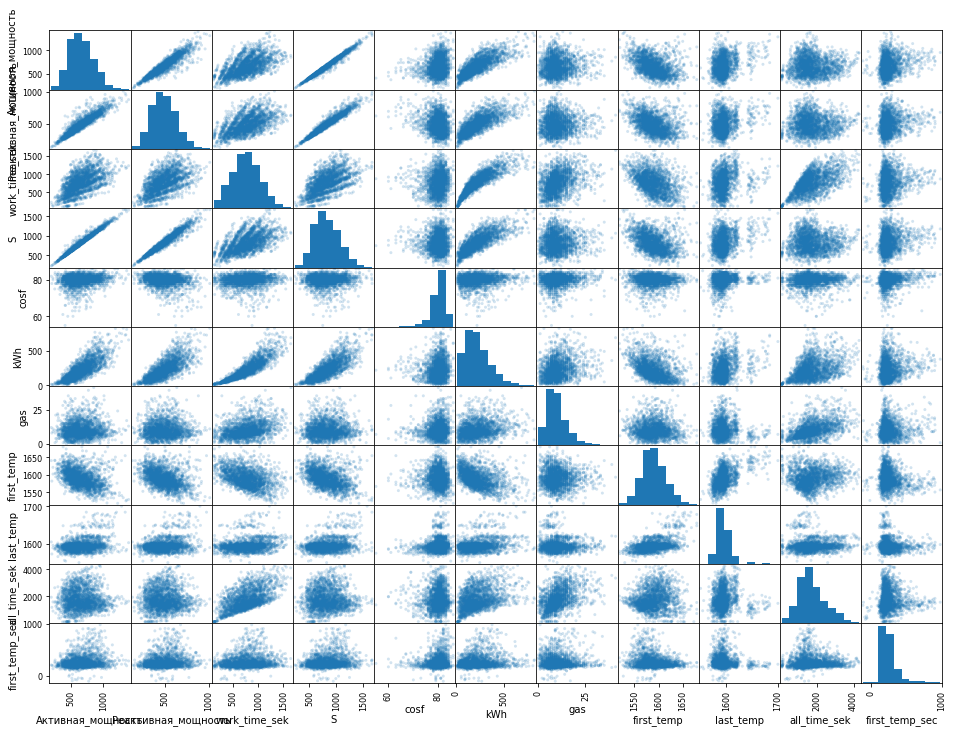

In [15]:
# Посмотрим на данные
pd.plotting.scatter_matrix(df[col], alpha=0.2, figsize=(16,12));

# 6. Обучим модели

In [16]:
# Выделим фичи и целевые признаки
target = df['last_temp']

# выберем все столбцы кроме столбцов с типом datetime64[ns]
col = []
for i in df.columns:
    if df[i].dtype != 'datetime64[ns]':
        col += [i]

features = df[col]
# Дополнительно удалим key, таргет и сильно кореллирующие фичи
features = features.drop(['key','last_temp','Активная_мощность','Реактивная_мощность'], 
                         # 'work_time_sek', 'all_time_sek', 'first_temp_sec'],
                         axis=1)

# разобъем данные на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(
features, target, test_size=0.1, random_state=12345)

In [17]:
# посмотрим на данные
print(X_train.shape)
print(X_test.shape)
display(features)

(1992, 15)
(222, 15)


,work_time_sek,S,cosf,kWh,Wire_1,Wire_2,Bulk_3,Bulk_4,Bulk_12,Bulk_14,Bulk_15,gas,first_temp,all_time_sek,first_temp_sec
0,1098,1165,83,400,60,0,0,43,206,150,154,29,1571,1583,844
1,811,912,84,244,96,0,0,73,206,149,154,12,1581,1144,193
2,655,597,84,145,91,0,0,34,205,152,153,28,1596,1525,383
3,741,953,84,221,89,0,0,81,207,153,154,18,1601,1093,800
4,869,1008,82,333,89,9,0,78,203,151,152,5,1576,1362,726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,723,996,80,216,89,0,21,0,256,129,223,7,1570,1208,280
2471,940,842,82,243,114,0,0,63,256,129,226,9,1554,1406,168
2472,569,961,76,154,94,9,0,85,230,124,226,6,1571,764,232
2473,750,828,82,213,118,0,90,0,206,129,207,14,1591,1358,363


### RandomForest

In [18]:
# Создадим модель
model = RandomForestRegressor(n_estimators=100, random_state=12345)
# обучим модель
model.fit(X_train, y_train)
# Предскажем
predicted = model.predict(X_test)
# Посчитаем средне квадратичную ошибку
print('\nMAE =', mean_absolute_error(predicted, y_test))


MAE = 5.475675675675681


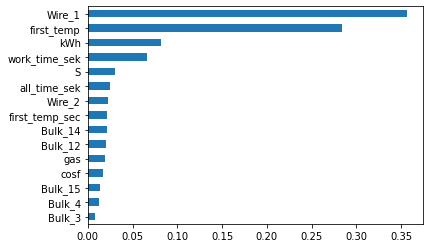

In [19]:
# Посмотрим на значимость фичей
t_importances = pd.Series(model.feature_importances_, index=features.columns).sort_values()
t_importances.plot(kind='barh');

### LightGBM

In [20]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval  = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 100,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'verbose': -1
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=50,
                verbose_eval=False)

print('Starting predicting...')
# predict
predicted = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print('\nMAE =', mean_absolute_error(predicted, y_test))

Starting training...
Starting predicting...

MAE = 5.192400942879457


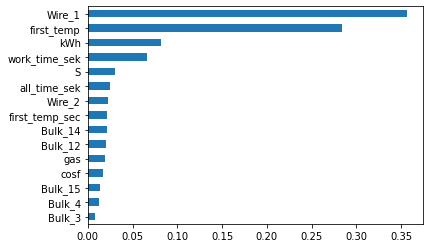

In [21]:
# Посмотрим на значимость фичей
t_importances = pd.Series(model.feature_importances_, index=features.columns).sort_values()
t_importances.plot(kind='barh');

### CatBoost

In [22]:
# initialize Pool
train_pool = Pool(X_train, y_train)
test_pool  = Pool(X_test)

# specify the training parameters 
model = CatBoostRegressor(iterations=2000, 
                          learning_rate=0.05, 
                          loss_function='RMSE',
                          silent=True)
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
predicted = model.predict(test_pool)

print('\nMAE =',mean_absolute_error(predicted, y_test))


MAE = 5.077057491085051


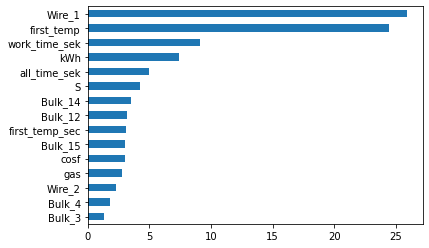

In [23]:
# Посмотрим на значимость фичей
t_importances = pd.Series(model.feature_importances_, index=features.columns).sort_values()
t_importances.plot(kind='barh');

# Вывод
В данном проекте были применены модели RandomForest, LightGBM и CatBoost. Наилучший результат показала модель CatBoost со значением метрики MAE = 5.